**PRÁCTICA FINAL MACHINE LEARNING**

Nombres:

    -María Cifuentes Pascual.
    -Martina Díaz González.
    -Óscar Domínguez Figueros.
    -Carlota García Bonilla.
    -Óscar Guerrero Calle.
    -Jorge de Rosario Martínez.



In [1]:
# Importamos librerías

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy.stats as ss
import warnings
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

Cargamos y visualizamos los datos. 

In [2]:
df = pd.read_csv("NCDB_1999_to_2014.csv", sep = ',', na_values=["U", "UU", "UUUU", "X", "XX", "XXXX"])
df.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,1.0,06,1990,01,M,41,11,1,NaN,1.0
1,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,01,M,19,11,1,NaN,1.0
2,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,02,F,20,13,2,02,2.0
3,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,1.0,01,1986,01,M,46,11,1,NaN,1.0
4,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,99.0,NN,NNNN,01,M,05,99,2,NaN,3.0
5,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,1.0,01,1984,01,M,28,11,1,NaN,1.0
6,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,2.0,01,1991,01,M,21,11,1,NaN,1.0
7,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,2.0,01,1991,02,F,NaN,13,2,NaN,2.0
8,1999,1.0,1.0,17.0,2,3.0,QQ,QQ,1,2,...,3.0,01,1992,01,M,NaN,11,2,NaN,1.0
9,1999,1.0,1.0,15.0,2,1.0,04,NaN,1,5,...,1.0,01,1997,01,M,61,11,1,NaN,1.0


Este conjunto de datos presenta 1942851 entradas para 22 variables.

In [3]:
df.shape

(5860405, 22)

    -U - Unknown
    -X - Jurisdiction not provide
    -Q - otro (categoría other)
    -N - not applicable (dummy)
    
    # U y X son missings

Eliminamos las variables V_ID y P_ID porque los datos referidos a la identidad no influyen sobre las causas y tipos de accidentes.

In [4]:
#df = df.drop('V_ID', axis = 1)
#df = df.drop('P_ID', axis = 1)

Vemos cuales son las columnas de nuestro conjunto de datos, es decir, las variables.

In [5]:
variables = df.columns
variables

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

In [6]:
#df = df[(df['C_YEAR'] == 1999) | (df['C_YEAR'] == 2014)]

Vemos si hay datos missing en nuestro conjunto de datos.

In [7]:
#df.isna()

Calculamos la suma de datos missing en cada variable. 

In [8]:
df.isna().sum()

C_YEAR         0
C_MNTH       385
C_WDAY      1323
C_HOUR     59409
C_SEV          0
C_VEHS       544
C_CONF    179019
C_RCFG    504648
C_WTHR     87975
C_RSUR     78451
C_RALN    434710
C_TRAF    223483
V_ID         433
V_TYPE     29754
V_YEAR    324122
P_ID          16
P_SEX     234954
P_AGE     377140
P_PSN      57662
P_ISEV     80701
P_SAFE    615188
P_USER    175586
dtype: int64

Suma del total de datos missing en el conjunto de todas las variables.

In [9]:
df.isna().sum().sum()

3465503

In [10]:
def NA(data):
    null_sum = data.isnull().sum()
    total = null_sum.sort_values(ascending = False)
    percent = (((null_sum / len(data.index))*100).round(2)).sort_values(ascending = False)
    df_NA = pd.concat([total, percent], axis=1, keys=['NA', '% NA'])
    return df_NA

In [11]:
NA(df)

,NA,% NA
P_SAFE,615188,10.50
C_RCFG,504648,8.61
C_RALN,434710,7.42
P_AGE,377140,6.44
V_YEAR,324122,5.53
P_SEX,234954,4.01
C_TRAF,223483,3.81
C_CONF,179019,3.05
P_USER,175586,3.00
C_WTHR,87975,1.50


Codificamos las variables objetivo. Distinguimos entre variables categóricas y continuas.

In [12]:
df['P_SEX'].unique()

array(['M', 'F', nan, 'N'], dtype=object)

In [13]:
df['P_SEX'] = df['P_SEX'].map({'F' : 0, 'M' : 1, 'N' : 'N'})

In [14]:
df['P_SEX'].unique()

array([1, 0, nan, 'N'], dtype=object)

In [15]:
var_cont = ['C_HOUR', 'C_VEHS', 'P_AGE']

In [16]:
df['P_AGE'].unique()

array(['41', '19', '20', '46', '05', '28', '21', nan, '61', '56', '34',
       '22', '30', '49', '32', '31', '68', '08', '45', '17', '33', '82',
       '39', '37', '55', '38', '43', '35', '23', '25', '65', '44', '36',
       '70', '50', '40', '27', '26', '15', '53', '16', '13', '14', '12',
       '18', '77', '86', '42', '24', '47', '62', '06', '57', '83', '74',
       '67', '51', '29', '01', '02', '54', '71', '10', '79', '63', '58',
       '48', '60', '07', '64', '75', '52', '85', '93', '92', '69', '72',
       '11', '59', '09', '66', '76', '73', '04', '78', '80', '84', '03',
       '81', '89', '87', '88', '90', 'NN', '91', '95', '97', '94', '99',
       '98', '96'], dtype=object)

In [17]:
df['C_HOUR'].unique()

array([20.,  8., 17., 15., 14.,  1., 11., 13., 19., 16.,  9.,  2., 18.,
       12., 10., 23.,  0.,  6.,  7., 21., nan,  5., 22.,  3.,  4.])

In [18]:
df['C_VEHS'].unique()

array([ 2.,  1.,  3.,  4.,  6.,  7.,  9., nan,  5., 13.,  8., 12., 14.,
       10., 11., 16., 26., 71., 19., 25., 21., 27., 15., 35., 22., 41.,
       46., 31., 18., 56., 23., 36., 17., 20., 29., 77., 28., 38., 32.,
       33., 54., 72., 40., 44., 58., 30., 24., 34., 39., 51., 57., 43.,
       37.])

In [19]:
def codificar_continuas(df, lista):
    listN = ['N', 'NN', 'NNNN'] #dummies
    listQ = ['Q', 'QQ'] #otra categoría más
    #listU = ['U', 'UU', 'UUUU'] #datos faltantes
    #listX = ['X', 'XX', 'XXXX'] #datos faltantes
    for variable in lista:
        for i in listN:
            df[variable] = df[variable].replace([i], 11111)
        for i in listQ:
            df[variable] = df[variable].replace([i], 33333)
        #for i in listU:
        #    df[variable] = df[variable].replace([i], 55555)
        #for i in listX:
        #    df[variable] = df[variable].replace([i], 55555)
        df[variable] = df[variable].fillna(int(df[variable].median()))
        df[variable] = df[variable].apply(int)

In [20]:
codificar_continuas(df, var_cont)

In [21]:
df['C_HOUR'].unique()

array([20,  8, 17, 15, 14,  1, 11, 13, 19, 16,  9,  2, 18, 12, 10, 23,  0,
        6,  7, 21,  5, 22,  3,  4], dtype=int64)

In [22]:
df['C_VEHS'].unique()

array([ 2,  1,  3,  4,  6,  7,  9,  5, 13,  8, 12, 14, 10, 11, 16, 26, 71,
       19, 25, 21, 27, 15, 35, 22, 41, 46, 31, 18, 56, 23, 36, 17, 20, 29,
       77, 28, 38, 32, 33, 54, 72, 40, 44, 58, 30, 24, 34, 39, 51, 57, 43,
       37], dtype=int64)

In [23]:
df['P_AGE'].unique()

array([   41,    19,    20,    46,     5,    28,    21,    34,    61,
          56,    22,    30,    49,    32,    31,    68,     8,    45,
          17,    33,    82,    39,    37,    55,    38,    43,    35,
          23,    25,    65,    44,    36,    70,    50,    40,    27,
          26,    15,    53,    16,    13,    14,    12,    18,    77,
          86,    42,    24,    47,    62,     6,    57,    83,    74,
          67,    51,    29,     1,     2,    54,    71,    10,    79,
          63,    58,    48,    60,     7,    64,    75,    52,    85,
          93,    92,    69,    72,    11,    59,     9,    66,    76,
          73,     4,    78,    80,    84,     3,    81,    89,    87,
          88,    90, 11111,    91,    95,    97,    94,    99,    98,
          96], dtype=int64)

In [24]:
df['P_AGE'].value_counts()

34    469307
18    171719
19    167721
20    158747
17    158163
       ...  
99       321
95       292
96       201
98       193
97       110
Name: P_AGE, Length: 100, dtype: int64

Agrupamos los datos en función de la variable P_AGE y el resto de las variables. Es decir, para las personas que lleven un año conduciendo, en el año que se esté considerando, habrán 11517 accidentes. 

In [25]:
df.groupby('P_AGE').count()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_PSN,P_ISEV,P_SAFE,P_USER
P_AGE,,,,,,,,,,,,,,,,,,,,,
1,39423,39422,39420,39423,39423,39423,38801,36158,39010,38992,...,38560,39421,39375,38697,39423,39079,39222,39382,38195,39034
2,25371,25370,25368,25371,25371,25371,24865,22898,25030,25025,...,24692,25369,25335,24816,25371,25306,25226,25340,24574,25071
3,25532,25531,25528,25532,25532,25532,25048,23206,25231,25234,...,24837,25531,25493,25042,25532,25463,25400,25502,24633,25232
4,26407,26407,26401,26407,26407,26407,25891,24027,26096,26101,...,25662,26405,26365,25780,26407,26324,26232,26387,25323,26038
5,26642,26642,26641,26642,26642,26642,26083,24159,26316,26338,...,25941,26640,26595,25929,26642,26573,26482,26624,25467,26298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,201,201,201,201,201,201,192,190,199,198,...,187,201,201,199,201,199,200,201,192,197
97,110,110,110,110,110,110,107,106,107,109,...,105,110,110,107,110,108,109,110,101,109
98,193,193,193,193,193,193,186,179,191,191,...,181,193,192,181,193,189,190,190,162,184


Eliminamos los datos relativos al "11111".

In [26]:
df = df.drop(df[df['P_AGE'] == 11111].index)

In [27]:
df['P_AGE'].unique()

array([41, 19, 20, 46,  5, 28, 21, 34, 61, 56, 22, 30, 49, 32, 31, 68,  8,
       45, 17, 33, 82, 39, 37, 55, 38, 43, 35, 23, 25, 65, 44, 36, 70, 50,
       40, 27, 26, 15, 53, 16, 13, 14, 12, 18, 77, 86, 42, 24, 47, 62,  6,
       57, 83, 74, 67, 51, 29,  1,  2, 54, 71, 10, 79, 63, 58, 48, 60,  7,
       64, 75, 52, 85, 93, 92, 69, 72, 11, 59,  9, 66, 76, 73,  4, 78, 80,
       84,  3, 81, 89, 87, 88, 90, 91, 95, 97, 94, 99, 98, 96],
      dtype=int64)

In [28]:
#variables = df.columns

In [29]:
var_cat = list(variables)
for var in var_cont:
    var_cat.remove(var)
print(var_cat, '|', len(var_cat))

['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_SEV', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID', 'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'] | 19


In [30]:
def codificar_categoricas(df, lista):
    listN = ['N', 'NN', 'NNNN']
    listQ = ['Q', 'QQ'] #otra categoría más
    #listU = ['U', 'UU', 'UUUU'] #datos faltantes
    #listX = ['X', 'XX', 'XXXX'] #datos faltantes
    for variable in lista:
        for i in listN:
            df[variable] = df[variable].replace([i], 11111)
        for i in listQ:
            df[variable] = df[variable].replace([i], 33333)
        # for i in listU:
            # df[variable] = df[variable].replace([i], 55555)
        # for i in listX:
            # df[variable] = df[variable].replace([i], 55555)
        # df[variable] = df[variable].apply(int)
        
        df[variable] = df[variable].fillna(55555)
        df[variable] = df[variable].apply(int)

In [31]:
#ponemos los missings por la moda, no cambio la que estaba hecha por si preferimos esa

In [32]:
from sklearn.impute import SimpleImputer
sim_imp = SimpleImputer(strategy = 'most_frequent')
def codificar_categoricas(df, lista):
    listN = ['N', 'NN', 'NNNN']
    listQ = ['Q', 'QQ'] #otra categoría más
    #listU = ['U', 'UU', 'UUUU'] #datos faltantes
    #listX = ['X', 'XX', 'XXXX'] #datos faltantes
    for variable in lista:
        for i in listN:
            df[variable] = df[variable].replace([i], 11111)
        for i in listQ:
            df[variable] = df[variable].replace([i], 33333)
        # for i in listU:
            # df[variable] = df[variable].replace([i], 55555)
        # for i in listX:
            # df[variable] = df[variable].replace([i], 55555)
        # df[variable] = df[variable].apply(int)
        
        df[variable]=sim_imp.fit_transform(df[variable].values.reshape(-1,1))
        df[variable] = df[variable].apply(int)

In [33]:
codificar_categoricas(df, var_cat)

Creamos la variables antigüedad del vehículo haciendo la diferencia entre C_YEAR y V_YEAR. 
Después eliminamos las variables anteriores C_YEAR y V_YEAR. 

In [34]:
def V_ANT(df):
    df['V_ANT'] = df['C_YEAR'] - df['V_YEAR']
    for i in df['V_ANT']:
        if i < 0:
            df['V_ANT'] = df['V_ANT'].replace([i], 11111)

In [35]:
V_ANT(df)

In [36]:
df['V_ANT'].unique()

array([    9,    12,    13, 11111,    15,     8,     7,     2,     6,
          14,    11,     5,     4,     1,    10,     3,    16,     0,
          34,    22,    21,    31,    18,    20,    23,    27,    17,
          24,    26,    25,    19,    32,    29,    28,    37,    30,
          33,    54,    36,    39,    49,    35,    40,    44,    41,
          96,    90,    50,    76,    38,    85,    91,    46,    93,
          60,    74,    51,    61,    92,    47,    95,    82,    87,
          55,    43,    69,    68,    48,    53,    52,    42,    45,
          56,    98,    62,    94,    64,    73,    58,    67,    79,
          66,    80,    84,    70,    71,    83,    86,    75,    59,
          65,    63,    77,    72,    81,    57,   100,    99,   101,
          78,    89,    97,    88,   103], dtype=int64)

In [37]:
df = df.drop('V_YEAR', axis = 1)
df = df.drop('C_YEAR', axis = 1)

In [38]:
# Ahora las N y las Q toman los valores 11111 y 33333. Cuando las metamos al label encoder se codificarán.

In [39]:
df.groupby('V_ANT').count()

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
V_ANT,,,,,,,,,,,,,,,,,,,,
0,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413,324413
1,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312,414312
2,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543,401543
3,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303,383303
4,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340,386340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
100,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
101,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [40]:
# Hay muchas con valor dummy o other. Parece que las N son para los peatones, reemplazamos este valor por 0.

In [41]:
df['V_ANT'] = df['V_ANT'].replace([11111], 0)

In [42]:
df['V_ANT'].unique()

array([  9,  12,  13,   0,  15,   8,   7,   2,   6,  14,  11,   5,   4,
         1,  10,   3,  16,  34,  22,  21,  31,  18,  20,  23,  27,  17,
        24,  26,  25,  19,  32,  29,  28,  37,  30,  33,  54,  36,  39,
        49,  35,  40,  44,  41,  96,  90,  50,  76,  38,  85,  91,  46,
        93,  60,  74,  51,  61,  92,  47,  95,  82,  87,  55,  43,  69,
        68,  48,  53,  52,  42,  45,  56,  98,  62,  94,  64,  73,  58,
        67,  79,  66,  80,  84,  70,  71,  83,  86,  75,  59,  65,  63,
        77,  72,  81,  57, 100,  99, 101,  78,  89,  97,  88, 103],
      dtype=int64)

In [43]:
NA(df)

,NA,% NA
C_MNTH,0,0.0
V_ID,0,0.0
P_USER,0,0.0
P_SAFE,0,0.0
P_ISEV,0,0.0
P_PSN,0,0.0
P_AGE,0,0.0
P_SEX,0,0.0
P_ID,0,0.0
V_TYPE,0,0.0


Observamos que ya no aparece ningún dato missing.

Actualizamos las listas de "var_cont" y "var_cat".

In [44]:
var_cont = ['C_HOUR', 'C_VEHS', 'P_AGE', 'V_ANT'] #Ya todas preparadas
var_cont

['C_HOUR', 'C_VEHS', 'P_AGE', 'V_ANT']

In [45]:
variables = list(df.columns)
var_cat = list(variables)
for var in var_cont:
    var_cat.remove(var)
print(var_cat, '|', len(var_cat))


['C_MNTH', 'C_WDAY', 'C_SEV', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'P_ID', 'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'] | 17


In [46]:
for variable in list(df.columns): 
    print('--------------------------------------------')
    print('Variable: ', variable, '|', 'Type: ', df[variable].dtype)
    print(df[variable].value_counts())
    print('--------------------------------------------')

--------------------------------------------
Variable:  C_MNTH | Type:  int64
8     545543
7     535976
12    524131
6     518444
10    514209
9     511215
1     498580
11    497592
5     466907
2     422022
3     416381
4     391389
Name: C_MNTH, dtype: int64
--------------------------------------------
--------------------------------------------
Variable:  C_WDAY | Type:  int64
5    998175
4    867045
6    864217
3    823020
2    814021
1    773552
7    702359
Name: C_WDAY, dtype: int64
--------------------------------------------
--------------------------------------------
Variable:  C_HOUR | Type:  int64
16    518276
17    499149
15    491563
14    455421
18    375057
12    367204
13    366357
8     302036
11    301151
19    280812
10    248301
9     227044
20    216563
7     207505
21    203605
22    164224
23    127066
6     105810
0      87836
2      76846
1      72779
3      63566
5      44713
4      39505
Name: C_HOUR, dtype: int64
-------------------------------------------

Codificación de las variables categóricas mediante el Label Encoder. Este método identifica los dintintos valores (clases) de cada variable y sustituye cada uno de ellos por un número. 

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for variable in var_cat:
    df[variable] = le.fit_transform(df[variable])

# ANÁLISIS DESCRIPTIVO

Histogramas de todas las variables para ver su distribución.

array([[<AxesSubplot:title={'center':'C_MNTH'}>,
        <AxesSubplot:title={'center':'C_WDAY'}>,
        <AxesSubplot:title={'center':'C_HOUR'}>,
        <AxesSubplot:title={'center':'C_SEV'}>,
        <AxesSubplot:title={'center':'C_VEHS'}>],
       [<AxesSubplot:title={'center':'C_CONF'}>,
        <AxesSubplot:title={'center':'C_RCFG'}>,
        <AxesSubplot:title={'center':'C_WTHR'}>,
        <AxesSubplot:title={'center':'C_RSUR'}>,
        <AxesSubplot:title={'center':'C_RALN'}>],
       [<AxesSubplot:title={'center':'C_TRAF'}>,
        <AxesSubplot:title={'center':'V_ID'}>,
        <AxesSubplot:title={'center':'V_TYPE'}>,
        <AxesSubplot:title={'center':'P_ID'}>,
        <AxesSubplot:title={'center':'P_SEX'}>],
       [<AxesSubplot:title={'center':'P_AGE'}>,
        <AxesSubplot:title={'center':'P_PSN'}>,
        <AxesSubplot:title={'center':'P_ISEV'}>,
        <AxesSubplot:title={'center':'P_SAFE'}>,
        <AxesSubplot:title={'center':'P_USER'}>],
       [<AxesSubplot:tit

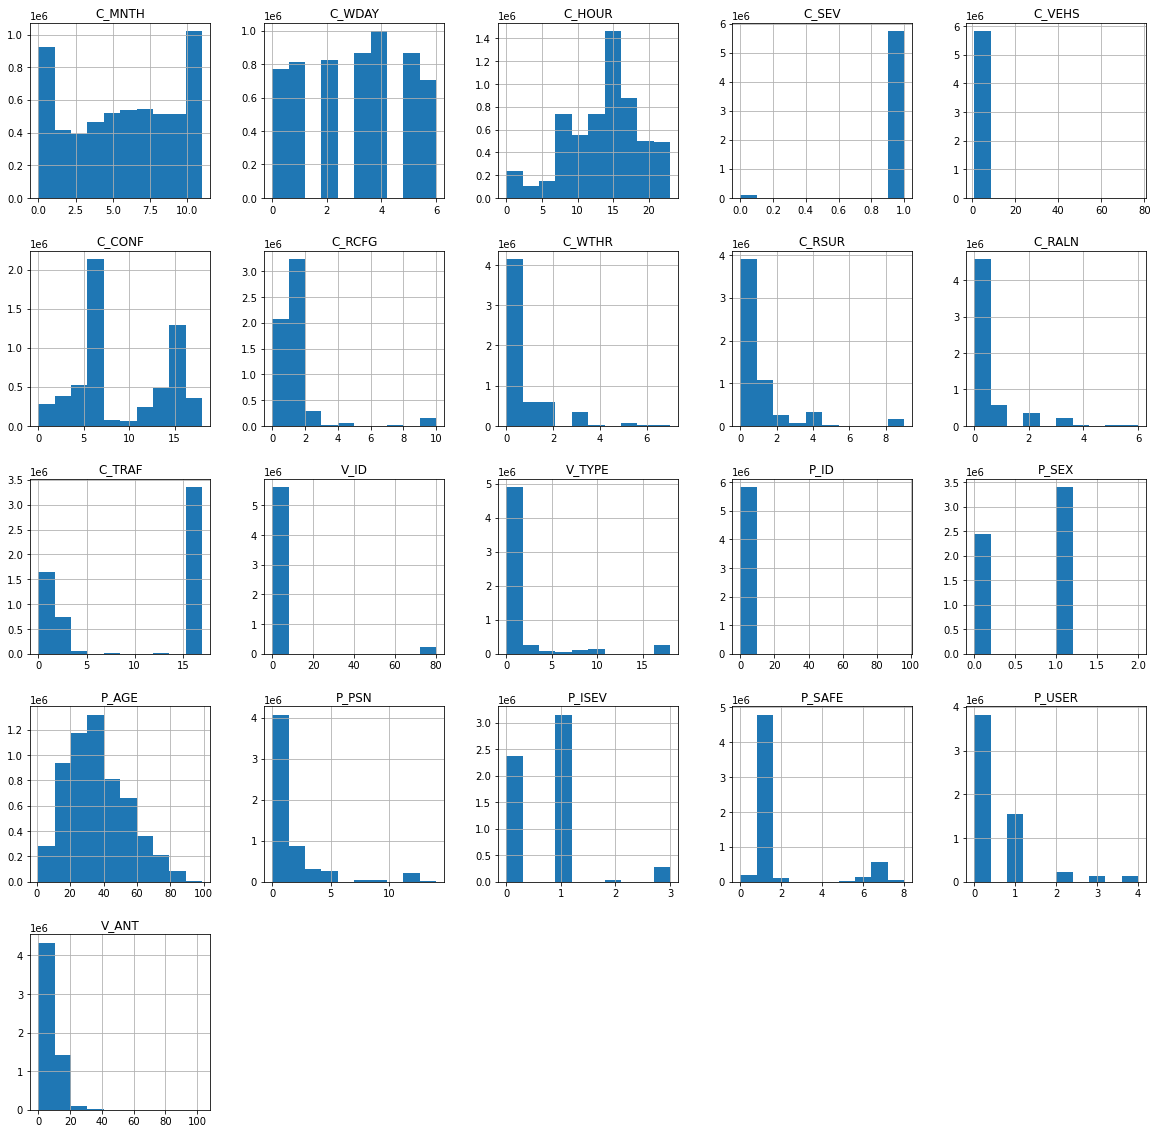

In [48]:
df.hist(figsize = (20, 20))

## Correlación entre las variables.

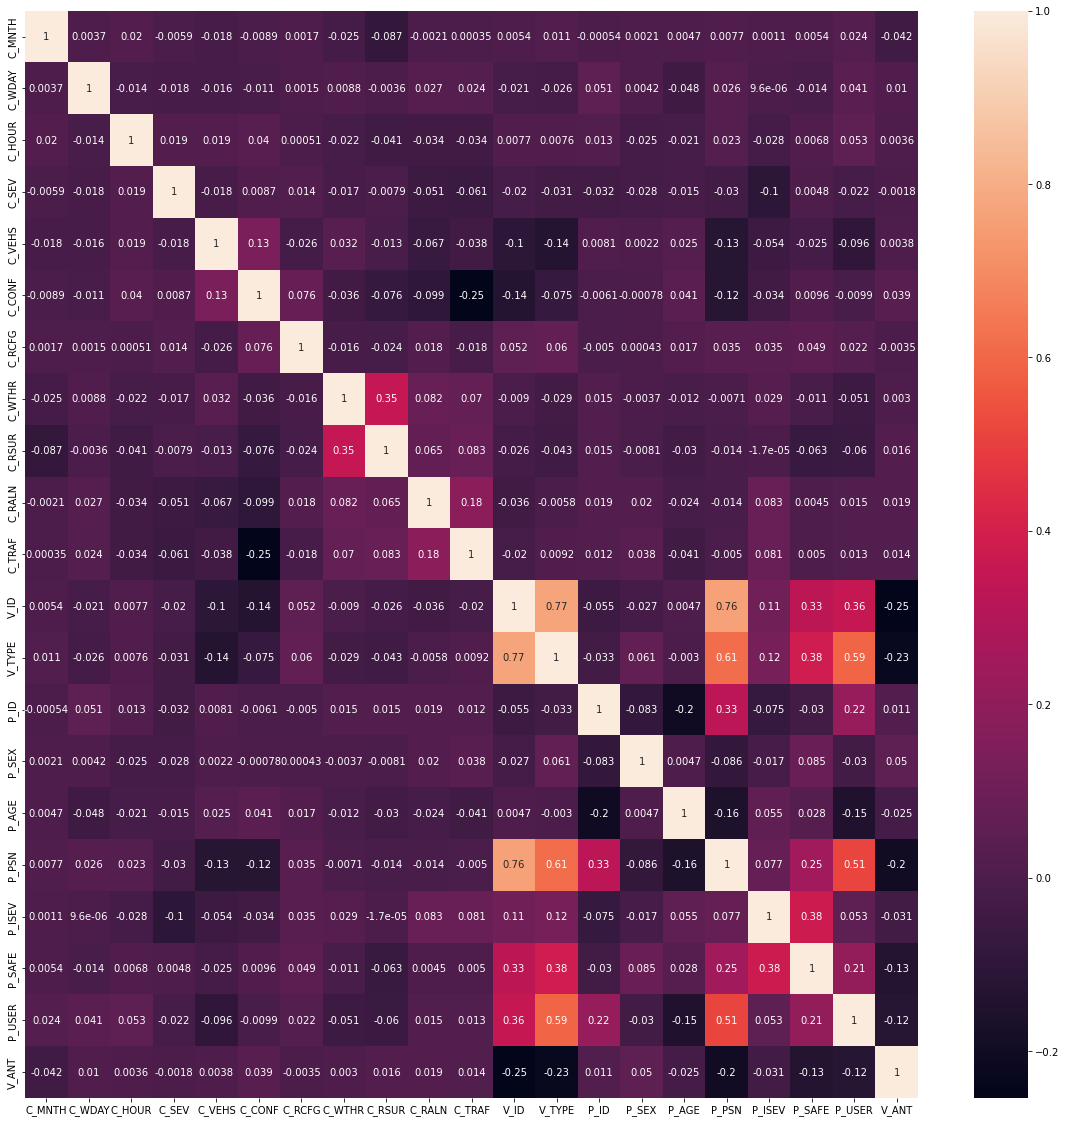

In [49]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

Vemos que la forma en la que están relacionadas nuestras variables ha cambiado. Seguimos obteniendo resultados similares: la mayoría de las variables son incorreladas, existen varias levemente correlacionadas y son muy pocos los casos los casos en los que las variables que lo están altamente. Sin embargo, la forma en la que estas se relacionan es distinta a como lo hacían antes, pues muchas variables que antes correlacionadas levemente ahora han pasado a tener correlación nula y, por otro lado, otras variables han pasado a estar altamente correlacionadas.



Ahora vemos cuántos accidentes son mortales y cuántos no. A los no mortales se les asigna el valor 1 y a los que sí lo son el valor 0. 

In [50]:
mortalidad_posible=df['C_SEV'].unique()
mortalidad_posible # 1: no hay muertes, 0: sí hay muertes.

array([1, 0], dtype=int64)

Observamos que muchos más accidentes no mortales, lo cual es bueno. 

In [51]:
df['C_SEV'].value_counts()

1    5744075
0      98314
Name: C_SEV, dtype: int64

<AxesSubplot:>

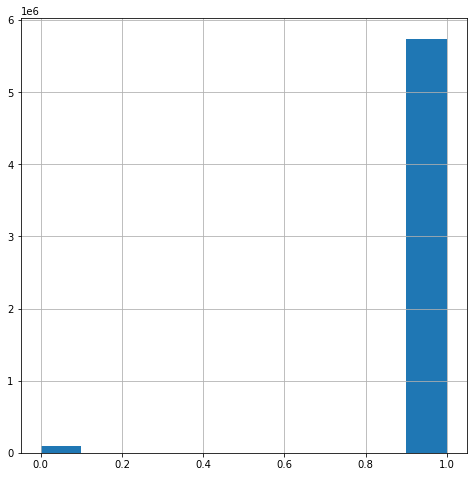

In [52]:
df['C_SEV'].hist(figsize = (8, 8)) #Vemos que el conjunto de datos está desbalanceado.

In [53]:
num = [0, 1, 2, 3, 4, 5, 6]
w_days = df['C_WDAY']
w_days = w_days.sort_values()
w_days = w_days.replace({1:"Lunes", 2:"Martes", 3:"Miércoles", 4:"Jueves", 5:"Viernes", 6:"Sábado", 7:"Domingo" })
h_days = df['C_HOUR']
h_days = h_days.sort_values()
weath_cond = df['C_WTHR']
weath_cond = weath_cond.replace({1:"Sunny", 2: "Overcast", 3:"Raining", 4:"Snowing", 5:"Freezing Rain", 6:"Visibility limitation (snow, fog, etc..)", 7: "Strong wind" })
road_cond = df['C_RSUR']
road_cond = road_cond.replace({1:"Dry, normal", 2:"Wet", 3:"Snow", 4:"Slush, wet snow", 5:"Icy", 6:"Sand/gravel/dirt", 7:"Muddy", 8:"Oil", 9:"Flooded"})
month_acc = df['C_MNTH']
month_acc = month_acc.sort_values()
month_acc = month_acc.replace({1:"ENE", 2:"FEB", 3:"MAR", 4:"ABR", 5:"MAY", 6:"JUN", 7:"JUL", 8:"AGO", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DIC",0:"Missing"})

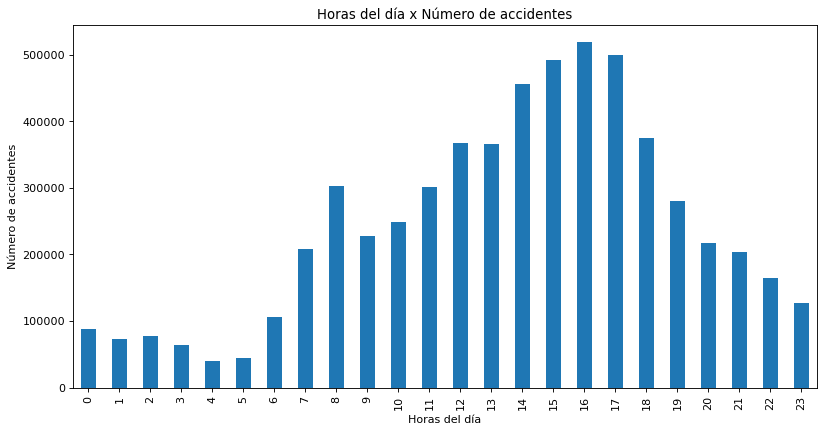

In [54]:
fig2 = plt.figure(figsize=(12, 6), dpi= 80)

ax2 = h_days.value_counts().sort_index().plot.bar()
ax2.set_xlabel("Horas del día")
ax2.set_ylabel("Número de accidentes")
plt.title("Horas del día x Número de accidentes")
plt.show()

En el anterior gráfico podemos ver la relación del número de accidentes con respecto a la hora del día en el que se produce. Por ejemplo, el momento del día en el que más accidentes se producen es a las 15h y eso podría ser porque muchas personas acaban su jornada laboral y tiene más prisa por llegar a casa. Al contrario ocurre en las horas de la madrugada que es cuando menos accidentes se producen. Esta situación podría ser a la inversa los fines de semana. 

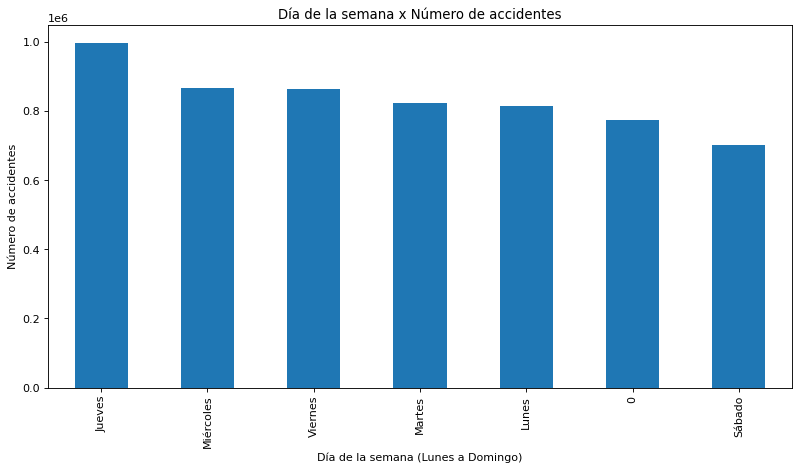

In [55]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = w_days.value_counts().plot.bar()
ax3.set_xlabel("Día de la semana (Lunes a Domingo)")
ax3.set_ylabel("Número de accidentes")
plt.title("Día de la semana x Número de accidentes")
plt.show()

En el anterior gráfico podemos ver la relación del número de accidentes con respecto a los días de la semana. Al contrario de lo que podría pensarse, no hay a penas diferencia entre cada día de la semana. De hecho los jueves son el día en el que más accidentes se producen. 

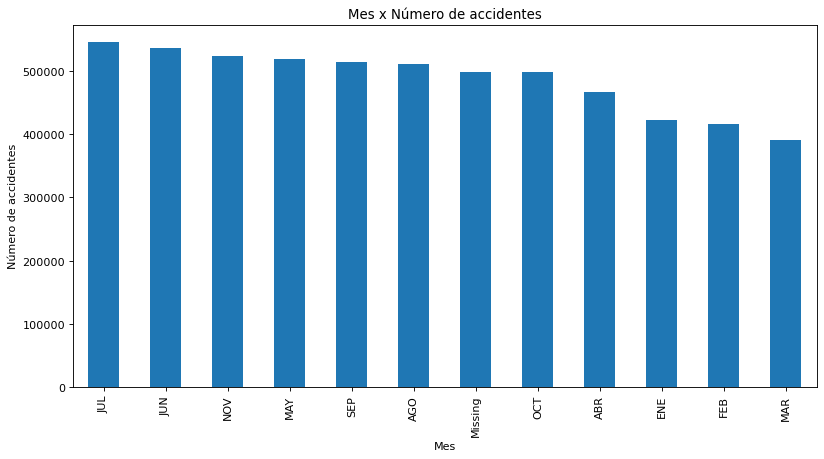

In [56]:
fig6 = plt.figure(figsize=(12, 6), dpi= 80)

ax6 = month_acc.value_counts().plot.bar()
ax6.set_xlabel("Mes")
ax6.set_ylabel("Número de accidentes")
plt.title("Mes x Número de accidentes")
plt.show()

En el anterior gráfico podemos ver la relación del número de accidentes con respecto el mes del año en el que se producen. En este caso vemos que cuando más accidentes hay es en los meses de verano, en particular en agosto.

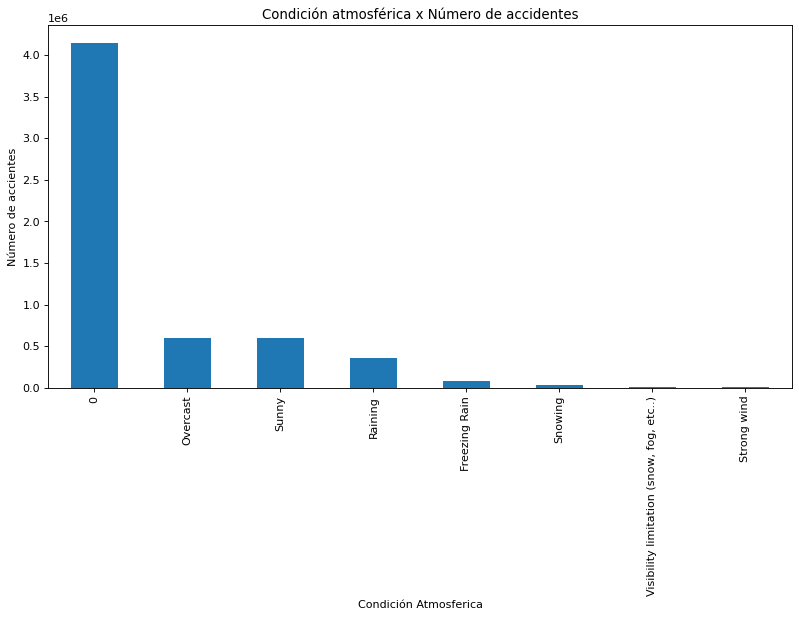

In [65]:
fig4 = plt.figure(figsize=(12, 6), dpi= 80)

ax4 = weath_cond.value_counts().plot.bar()
ax4.set_xlabel("Condición Atmosferica")
ax4.set_ylabel("Número de accientes")
plt.title("Condición atmosférica x Número de accidentes")
plt.show()

En el anterior gráfico podemos ver la relación del número de accidentes con respecto a las diferentes condiciones atmostéricas. Vemos que el mayor número de accidentes se produce cuando hay mucho viento. Por ejemplo, se suele aconsejar a los vehículos, en particular a las motos, que no se coloquen cerca de los camiones en estas condiciones. 

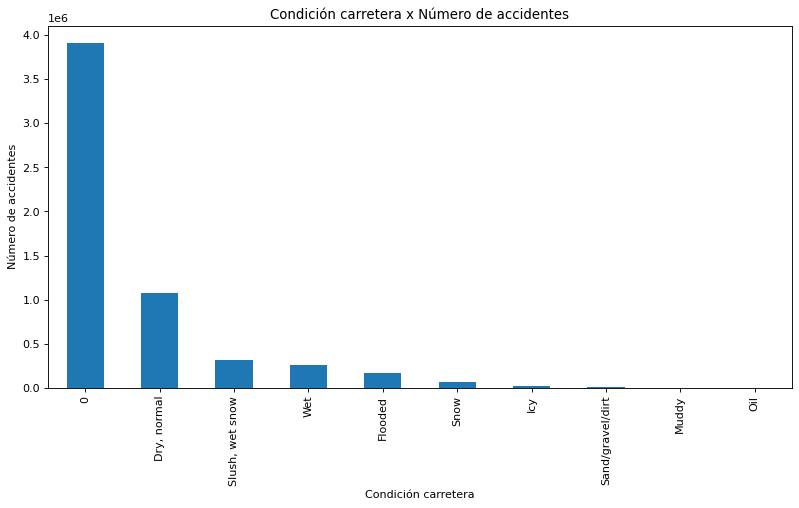

In [66]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = road_cond.value_counts().plot.bar()
ax3.set_xlabel("Condición carretera")
ax3.set_ylabel("Número de accidentes")
plt.title("Condición carretera x Número de accidentes")
plt.show()

En el anterior gráfico podemos ver la relación del número de accidentes con respecto a la condiciones de la carretera. En este caso el mayor número de accidentes se producen es cuando cae granizo (freezing rain). Esto puede pasar porque el coche deslice mal sobre la carretera, el ruido al caer sobre el coche puede distraer al conductor, pueden ocurrir desperfectos al vehículo, limita la visibilidad porque el limpiaparabrisas funciona peor...

### DATOS

Utilizamos "under_sampling" dado que es una buena forma de equilibrar conjuntos de datos desiguales manteniendo todos los datos en la clase minoritaria y disminuyendo el tamaño de la clase mayoritaria, ya que un conjunto de datos desequilibrado puede conducir a resultados sesgados. 

In [67]:
from imblearn.under_sampling import RandomUnderSampler

Filas que nos quedamos: 196628


<AxesSubplot:>

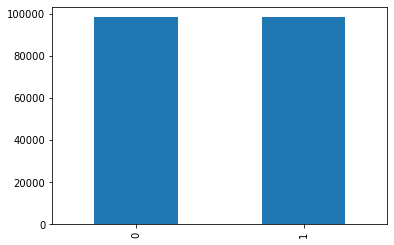

In [68]:
# hacemos undersampling para balancear la variable objetivo:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_1,y_1=rus.fit_resample(df, df[['C_SEV']].values)
print('Filas que nos quedamos:', len(rus.sample_indices_))
indicadores_undersampled = df.iloc[rus.sample_indices_]
indicadores_undersampled['C_SEV'].value_counts().plot.bar()

Una vez aplicado este método observamos que los datos aparecen balanceados. 

Separamos el conjunto de los datos en un subconjunto de entrenamiento y otro de test. Posteriormente realizamos el escalado de los datos. 

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(X_1.drop('C_SEV', axis = 1).astype(float), y_1.astype(int), test_size=0.25, random_state=0, stratify=y_1)
print(X_train.shape, X_test.shape,y_train_1.shape, y_test_1.shape)

(147471, 20) (49157, 20) (147471,) (49157,)


In [70]:
from sklearn.preprocessing import MinMaxScaler
col=list(X_train.columns)
scaler = MinMaxScaler().fit(X_train)
datos_escalados_1 = scaler.transform(X_train)
X_train_1 = pd.DataFrame(datos_escalados_1,columns=col)
X_train_1.head()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_ANT
0,0.818182,0.666667,0.608696,0.013158,0.611111,0.1,0.142857,0.444444,0.166667,0.941176,0.0000,0.0,0.000000,1.0,0.326531,0.000000,0.666667,0.125,0.00,0.090909
1,0.181818,0.500000,0.695652,0.026316,0.333333,0.0,0.000000,0.000000,0.166667,0.941176,0.0250,0.0,0.000000,1.0,0.255102,0.000000,0.000000,0.125,0.00,0.050505
2,0.181818,0.500000,0.043478,0.013158,0.888889,0.1,0.000000,0.000000,0.000000,0.000000,0.0125,0.0,0.000000,0.0,0.387755,0.000000,0.333333,0.125,0.00,0.040404
3,1.000000,0.666667,0.913043,0.013158,0.722222,0.1,0.142857,0.444444,0.000000,0.000000,0.0125,0.0,0.029851,1.0,0.244898,0.214286,0.333333,0.000,0.25,0.020202
4,0.363636,0.333333,0.521739,0.013158,0.333333,0.0,0.000000,0.000000,0.000000,0.941176,0.0125,0.0,0.044776,0.0,0.030612,0.428571,0.000000,0.125,0.25,0.131313


In [71]:
X_test_1 = scaler.transform(X_test)

Ya tenemos los datos escalados y preparados para los algoritmos

# ALGORITMOS DE CLASIFICACIÓN

In [72]:
import seaborn as sns
from matplotlib import pyplot as plt


def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()
    

# Regresión logística

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [74]:
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-2,2,10)
param_grid = {'C': vectorC }
logreg=LogisticRegression(random_state=2,solver='liblinear')
grid = GridSearchCV(logreg,
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10,n_jobs=-1)

grid.fit(X_train_1, y_train_1)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=2, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])},
             scoring='accuracy')

best mean cross-validation score: 0.718
best parameters: {'C': 100.0}


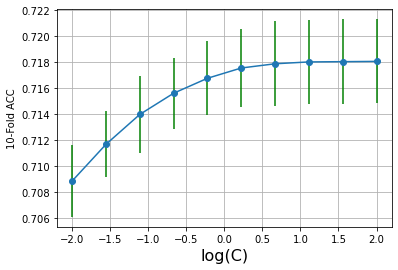

In [75]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold ACC')
plt.grid()
plt.show()

Mediante el método de la validación cruzada estimamos la habilidad del modelo en nuevos datos donde obtenemos un 72,1% de mejor resultado. 

In [76]:
Copt = grid.best_params_['C'] #nos quedamos con el mejor parámetro encontrado

In [77]:
reg=LogisticRegression(solver='newton-cg',C = Copt, max_iter=100)
DatosRL = reg.fit(X_train_1, y_train_1)
predRL = reg.predict(X_test_1)
prob_pred = reg.predict_proba(X_test_1)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [78]:
reg.coef_

array([[ -0.16306286,  -0.364289  ,   0.27320694,  -4.27715163,
         -0.56105993,   0.76829022,  -0.29634595,   0.14226156,
         -1.25551452,  -1.08888355,   0.5961002 ,  -1.6967592 ,
        -18.56189934,  -0.52200992,  -0.8087634 ,  -0.471471  ,
         -3.08173582,   1.55073509,   0.49049704,  -0.2147877 ]])

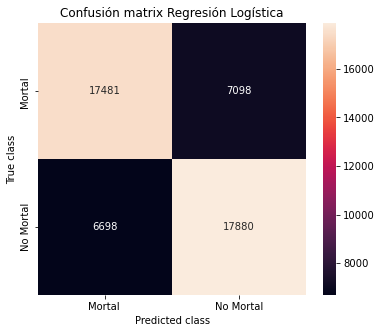

In [79]:
conf_matrix= confusion_matrix(y_test_1, predRL)
plt.figure(figsize=(6,5))
labels= ['Mortal ', 'No Mortal']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Regresión Logística')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Esta tabla describe el rendimiento del un modelo supervisado de Machine Learning en los datos de prueba donde se desconocen los verdaderos valores. Se llama "matriz de confución" porque hace que sea fácil detectar dónde es sistema está confundiendo dos clases.  Esta tabla es utilizada para un problema de clasificación en el que estamos prediciendo si una persona ha tenido un accidente mortal o no. 

Anteriormente hemos asignado el valor 0 a los accidentes mortales y el 1 a los no mortales. 

En la cuadrícula vemos que: 

True negative (0,0): persona que ha tenido un accidente mortal y el modelo lo clasifica como accidente mortal. 

True positive (1,1): persona que ha tenido un accidente no mortal y el modelo lo clasifica como accidente no mortal.


False positive (0,1): persona que ha tenido un accidente mortal y el modelo lo clasifica como accidente no mortal. 

False negative (1,0): persona que ha tenido un accidente no mortal y el modelo lo clasifica como accidente mortal.

Vemos que los resultados con test son: hay 17481 han sido clasificados como true negative, 17880 como true positive, 6698 false negative y 7098 false positive. 

In [80]:
print('Por lo tanto nuestra tasa de acierto: ', accuracy_score(predRL, y_test_1))

Por lo tanto nuestra tasa de acierto:  0.7193482108346726


La tasa de acierto es de aproximadamente un 72%.

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, predRL))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72     24579
           1       0.72      0.73      0.72     24578

    accuracy                           0.72     49157
   macro avg       0.72      0.72      0.72     49157
weighted avg       0.72      0.72      0.72     49157



Vemos que las métricas están muy igualadas con un 72% de precisión

Área bajo la curva:

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


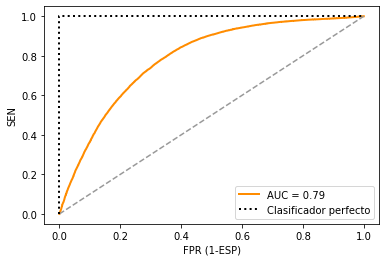

In [82]:
y_prob = reg.predict_proba(X_test_1)[:,1]
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

La curva ROC nos dice cómo de bueno es nuestro modelo a la hora de distinguir entre dos clases, en este caso los accidentes mortales y no mortales. Esta curva está definida por la sensibilidad que es la tasa de verdadero positivo y "1-ESP" es la tasa de falso positivo. La métrica de evaluación AUC se calucla como el área bajo una curva ROC y es uan representación escalar del rendimiento esperado de un clasificador. La métrica AUC mide la tasa de positivos verdaderos frente a la tasa de falsos positivos. El valor obtenido es 0.79, por lo que hay un 79% de probabilidad de qeu el modelo pueda distinguir entre clase positiva y clase negativa. Es decir, entre (mortal, mortal) y (no mortal, no mortal).

# ÁRBOLES DE DECISIÓN

**faltan cosas **
En primer lugar vamos a estudiar la precisión obtenida por validación cruzada para distintos valores del parámetro "max_depth" (profundidad del árbol) y, así, poder decidir qué valor utilizar en nuestro modelo.

In [83]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

best mean cross-validation score: 0.808
best parameters: {'max_depth': 9}


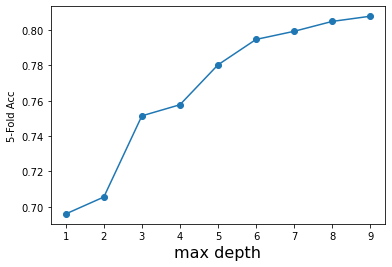

In [84]:
maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train_1, y_train_1)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Nuestro mejor resultado es para "max_depth" = 9 con una precisión de casi un 81%. 

In [85]:
arbol = DecisionTreeClassifier(max_depth = 9)
arbol.fit(X_train_1, y_train_1)

DecisionTreeClassifier(max_depth=9)

In [86]:
y_pred_train = arbol.predict(X_train_1)
y_pred_test = arbol.predict(X_test_1)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [87]:
#errores en train

In [88]:
from sklearn import metrics

In [89]:
from sklearn.metrics import roc_curve, auc

# Matriz de confusión 

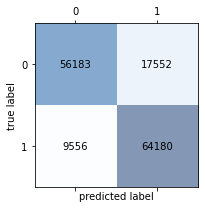

In [90]:
confmat_train = metrics.confusion_matrix(y_train_1, y_pred_train)
plot_confusion_matrix(confmat_train)

Al igual que antes vemos que el modelo funciona correctamente. Donde más valores hay es en true negative y true positive y donde menos en false negative y false positive. El mayor valor lo obtiene el true positive con 64180 datos y el menor valor el false negative con 9556 datos. 


ACC:  0.8161808084301321
SEN:  0.8704025170879895
ESP:  0.7619583644131009
PPV:  0.7852493515391769
FSC:  0.8256361437723518


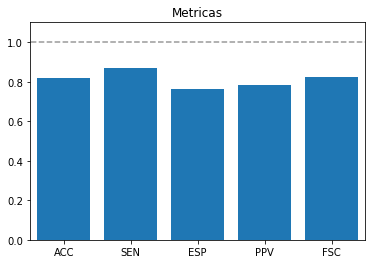

In [91]:
calcula_metricas(confmat_train)

En cuanto a las métricas del conjunto tenemos unos porcentajes muy altos de precisión. Por ejemplo, en el que más tenemos es una sensibilidad (SEN) del 87% seguido del F1-score (FSC) de aproximadamente un 83%. 

In [92]:
#errores en test

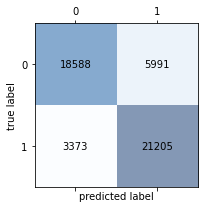

In [93]:
confmat_test = metrics.confusion_matrix(y_test_1, y_pred_test)
plot_confusion_matrix(confmat_test)

Los resultados obtenidos para los datos de test siguen el mismo patrón que los datos de train, es decir, true negative es menor que true positive y false negative es menor que false positive. Además todos son una fracción de los datos con respecto al anterior. 

ACC:  0.809508310108428
SEN:  0.8627634469851087
ESP:  0.7562553399243257
PPV:  0.7797102515075747
FSC:  0.8191370185807549


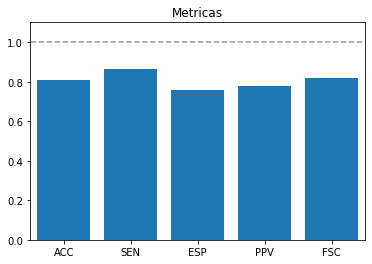

In [94]:
calcula_metricas(confmat_test)

In [95]:
#curva roc

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


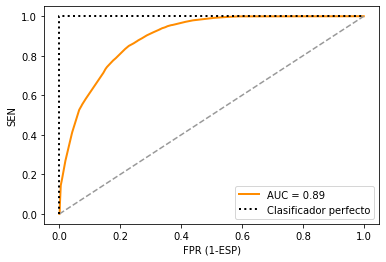

In [96]:
y_prob = arbol.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Vemos que con árboles de decisión la métrica AUC ha aumentado un 10%. 

In [97]:
#random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

best mean cross-validation score: 0.829
best parameters: {'max_depth': 14}


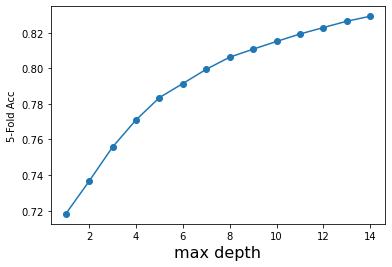

In [99]:
# grid search
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 200), scoring= 'accuracy', param_grid = param_grid, cv = 5)
grid.fit(X_train_1, y_train_1)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Mediante el método de validación estimamos la habilidad del modelo en nuevos datos donde obtenemos el mejor resultado con 83% para "max_depth" = 14.

In [ ]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 14).fit(X_train_1, y_train_1)

In [ ]:
y_pred_train = rf.predict(X_train_1)
y_pred_test = rf.predict(X_test_1)

In [ ]:
#error train

In [ ]:
confmat_train = metrics.confusion_matrix(y_train_1, y_pred_train)
plot_confusion_matrix(confmat_train)

La matriz de confusión nos da: 19.049 casos clasificados como True negative, 5530 como false positive, 2806 como false negative y 21.772 como true positive. Estos resultados siguen siendo buenos ya que el modelo lo clasifica correctamente.

In [ ]:
calcula_metricas(confmat_train)

Vemos que las métricas de sensibilidad y f1-Score vuelven a ser las más altas con un 92% y 87,4% de precisión.

In [ ]:
#error test

In [ ]:
confmat_test = metrics.confusion_matrix(y_test_1, y_pred_test)
plot_confusion_matrix(confmat_test)

In [ ]:
calcula_metricas(confmat_test)

In [ ]:
#curva roc

In [ ]:
y_prob = rf.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Respecto a los árboles de decisión la métrica AUC ha aumentado un 3%, con un 92%.

# KNN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Vamos a estudiar qué valor del hiperpárametro k es el mejor analizando la precisión obtenida para cada valor de k:

ks = list(range(1, 11)) #Creamos una lista con los valores 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

# Creamos un diccionario en el que iremos recogiendo las accuracies (precisión) de las predicciones con los diferentes k´s
accuracies = {}
for k in ks:
    # Definimos el modelo con el valor de hiperparámetro correspondiente
    knn = KNeighborsClassifier(n_neighbors=k)
    # Ajustamos a los datos de entrenamiento
    knn.fit(X_train_1, y_train_1)
    # Hacemos predicciones sobre los datos de test
    y_pred_test = knn.predict(X_test_1)
    # Evaluamos y guardamos la accuracy de cada uno
    acc = metrics.accuracy_score(y_test_1, y_pred_test)
    accuracies[k] = acc

In [ ]:
accuracies

In [ ]:
ks_arr = np.fromiter(accuracies.keys(), dtype=int)
accs_arr = np.fromiter(accuracies.values(), dtype=float)

plt.plot(ks_arr, accs_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('Acc. sobre test');

El mejor resultado se ha obtenido para k=10 con una precisión de más de 0,78.

In [ ]:
#Definimos el modelo

knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
#Entrenamos el modelo
knn.fit(X_train_1, y_train_1)

#Realizamos una predicción
y_pred_train=knn.predict(X_train_1)
y_pred_test=knn.predict(X_test_1)

In [ ]:
import funciones_auxiliares as f_aux

In [ ]:
# Matriz de confusión conjunto de entrenamiento:
confmat_train = metrics.confusion_matrix(y_train_1,y_pred_train)
f_aux.plot_confusion_matrix(confmat_train)

Los resultados para la metriz de entrenamiento son para: true negative con 19927 y true positive con 20689. Respecto el algoritmo anterior ha aumentado el false negative con más de 2000 casos.

In [ ]:
# Métricas conjunto de entrenamiento:
f_aux.calcula_metricas(confmat_train)

Las métricas del entrenamiento siguen el mismo patrón aunque hayan disminuido un poco. Con este algoritmo todas las métricas están muy igualadas.

In [ ]:
# Matriz de confusión conjunto de test:
confmat_test = metrics.confusion_matrix(y_test_1,y_pred_test)
f_aux.plot_confusion_matrix(confmat_test)

In [ ]:
# Métricas conjunto de test:
f_aux.calcula_metricas(confmat_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

In [ ]:
y_prob = knn.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':',color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Tenemos un 86% de acierto con la métrica AUC.

# GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]# estudiar los hiperparametros y usar cualquier modelo aprendido

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_1, y_train_1)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_1, y_test_1))

Obtenemos una tasa de acierto del 81,3% para el GradientBoosting.

In [ ]:
# Gradient boosting

clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=130,
              random_state=2408,
              verbose=1)
clf.fit(X_train_1,y_train_1)

In [ ]:
#Entrenamos el modelo
clf.fit(X_train_1, y_train_1)

#Realizamos una predicción
y_pred_train=clf.predict(X_train_1)
y_pred_test=clf.predict(X_test_1)

In [ ]:
# Matriz de confusión conjunto de entrenamiento:
confmat_train = metrics.confusion_matrix(y_train_1,y_pred_train)
f_aux.plot_confusion_matrix(confmat_train)

In [ ]:
# Métricas conjunto de entrenamiento:
f_aux.calcula_metricas(confmat_train)

In [ ]:
# Matriz de confusión conjunto de test:
confmat_test = metrics.confusion_matrix(y_test_1,y_pred_test)
f_aux.plot_confusion_matrix(confmat_test)

In [ ]:
# Métricas conjunto de test:
f_aux.calcula_metricas(confmat_test)

In [ ]:
# Área bajo la curva:

y_prob = clf.predict_proba(X_test_1)[:,1]

ejex, ejey, _ = roc_curve(y_test_1, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

    5.Red Neuronal

Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas.

Las unidades de procesamiento se organizan en capas. Hay tres partes en una red neuronal : una capa de entrada, con unidades que representan los campos de entrada; una o varias capas ocultas; y una capa de salida, con una unidad o unidades que representa el campo o los campos de destino. 

Para hacer una buena red neuronal se han de tener en consideración bastantes parámetros, algunos de los más importantes son:

Número y tamaño de capas

La capa de entrada y salida son sencillas de establecer. La capa de entrada tiene tantas neuronas como predictores y la capa de salida tiene una neurona en problemas de regresión y tantas como clases en problemas de clasificación.

Cuantas más neuronas y capas, mayor la complejidad de las relaciones que puede aprender el modelo. Sin embargo, dado que en cada neurona está conectada por pesos al resto de neuronas de las capas adyacentes, el número de parámetros a aprender aumenta y con ello el tiempo de entrenamiento.

Learning rate
El learning rate o ratio de aprendizaje establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza . Este hiperparametro indica que tan largo sera el camino que tome el algoritmo de optimización. Si el valor es muy pequeño la actualización se puede quedar atrapada en un minimo local.  Por otro lado si los valores son muy altos la actualización puede pasarse del punto perfecto que sería el minimo global y nunca encontrarlo 

Algoritmo de optimización

La mayoria de los algoritmos provienen del algoritmo del descenso del gradiente pero mejorado, se tienen en cuenta diferentes casos:

Para conjuntos de datos pequeños: l-bfgs

Para conjuntos de datos grandes: adam o rmsprop


Penalización L1 y L2 El objetivo de la penalización L1 y L2 es evitar que los pesos tomen valores excesivamente elevados. 
HAremos una Validacion cruzada para buscar los optimos.

- Comenzamos con un red neuronal con 0 capsa ocultas

In [ ]:
import tensorflow as tf

In [ ]:
capa = tf.keras.layers.Dense(units = 1, input_shape=[20])
neural = tf.keras.Sequential([capa])
neural.compile(
  optimizer=tf.keras.optimizers.Adamax(0.1),
  loss="mean_squared_error"
)

In [ ]:
historico = neural.fit(X_train_1, y_train_1, epochs=100, verbose=False)

Vemos que a partir de un cirerto punto, no mejora la red neuronal dado que hemos obtenido los pesos optimos. 

In [ ]:
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"])
plt.show()

In [ ]:
predNN_0 = neural.predict(X_test_1)

# Error cuadrático medio
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_1, predNN_0)))

# mas cerca 1 mejor
print('Variance score: %.2f' % r2_score(y_test_1, predNN_0))

Es la mas simple, asique es normal que salgan cosas bjaas, vamos a probar que pasaria si ponemos mas iteraciones.
<!--  -->

In [ ]:
historico = neural.fit(X_train_1, y_train_1, epochs=1000, verbose=False)

In [ ]:
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"])
plt.show()

Observamos que no cambai el resultado

In [ ]:
predNN_0_1000 = neural.predict(X_test_1)

# Error cuadrático medio
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_1, predNN_0_1000)))

# mas cerca 1 mejor
print('Variance score: %.2f' % r2_score(y_test_1, predNN_0_1000))

- Ahora procedemos con una o mas capas ocultas

In [ ]:
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Pipeline que definirá el modelo
# ==============================================================================
pipe = Pipeline([('modelo', MLPRegressor(solver = 'adam', max_iter= 1000))])

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 200,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 6, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train_1, y =y_train_1)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

In [ ]:
neural_final = grid.best_estimator_
neural_final['modelo'].get_params()

In [ ]:
predNNML = neural_final.predict(X = X_test_1)

# Error cuadrático medio
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_1, predNNML)))

# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(y_test_1, predNNML))

# Comparacion entre las distintas métricas y los algoritmos